In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
data = pd.read_csv(r"C:\Users\rohan\Downloads\Language Detection.csv")
data["Language"].value_counts()

X = data["Text"]
y = data["Language"]

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [5]:
data_list = []
for text in X:
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    data_list.append(text)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [8]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [9]:
y_pred = model.predict(x_test)

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

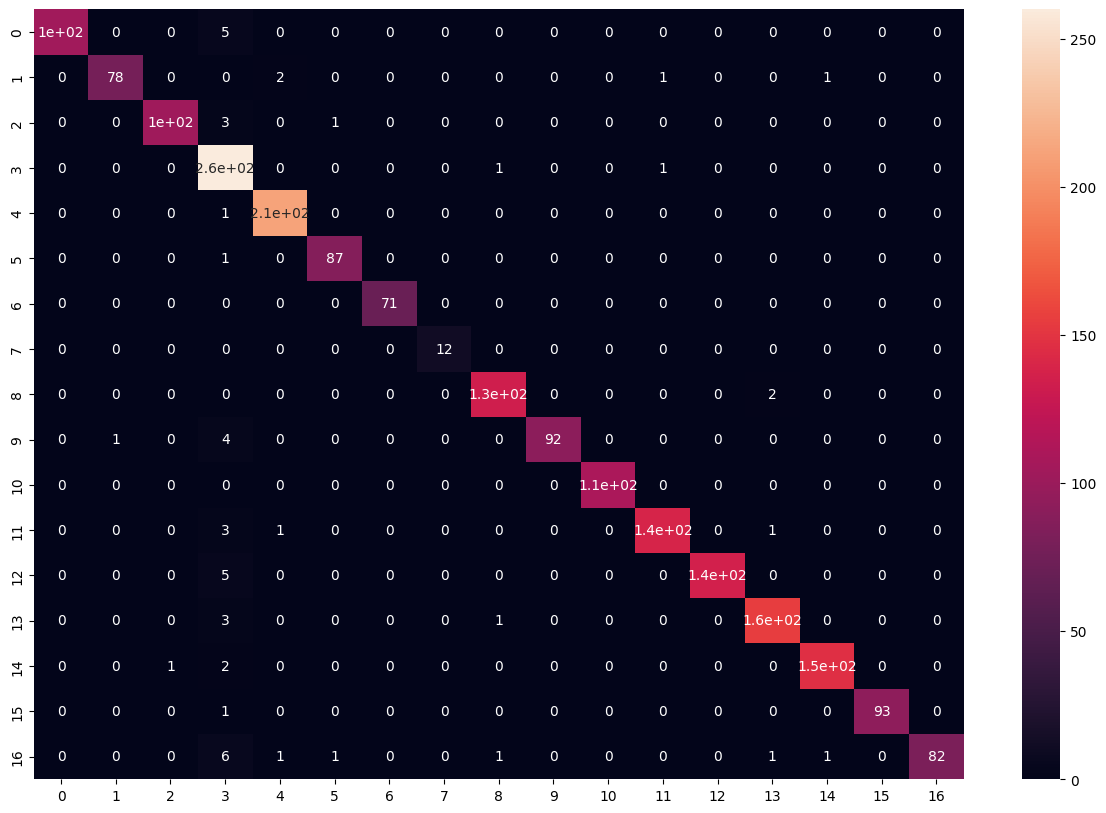

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [14]:
def prediction(text):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    print("The langauge is in",lang[0])

In [15]:
prediction("Analytics Vidhya provides a community based knowledge portal for Analytics and Data Science professionals")

The langauge is in English


In [16]:
prediction("ನಾನು ನಿನ್ನನ್ನು ಪ್ರೀತಿಸುತ್ತೇನೆ")

The langauge is in Kannada


In [17]:
prediction("சிறப்புப் பெயர்ச் சொல்")

The langauge is in Tamil
